In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("/content/healthnew.csv")
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [14]:
data['Full Name'] = data['First Name of the Provider'].fillna('') + ' ' + \
                    data['Middle Initial of the Provider'].fillna('') + ' ' + \
                    data['Last Name/Organization Name of the Provider'].fillna('')

# Remove extra spaces
data['Full Name'] = data['Full Name'].str.replace('  ', ' ').str.strip()

# Drop the original name columns
name_columns_to_drop = ['Last Name/Organization Name of the Provider',
                        'First Name of the Provider',
                        'Middle Initial of the Provider']
full_name_column = data.pop('Full Name')
data.insert(1, 'Full Name', full_name_column)
data_cleaned = data.drop(columns=name_columns_to_drop)
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()
data_cleaned.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,SAINT LOUIS,631041004.0,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,I,2950 VILLAGE DR,NaN,FAYETTEVILLE,283043815.0,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,I,20 WASHINGTON AVE,STE 212,NORTH HAVEN,64732343.0,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,I,5746 N BROADWAY ST,NaN,KANSAS CITY,641183998.0,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,I,875 MILITARY TRL,SUITE 200,JUPITER,334585700.0,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [15]:
# List of columns to remove
columns_to_remove = [
    'Street Address 1 of the Provider', 'Street Address 2 of the Provider',
    'City of the Provider', 'Zip Code of the Provider', 'State Code of the Provider',
    'Country Code of the Provider', 'HCPCS Code', 'HCPCS Description', 'Place of Service', 'HCPCS Drug Indicator',
    'Last Name/Organization Name of the Provider','First Name of the Provider',	'Middle Initial of the Provider'

]

# Remove the columns
data_cleaned = data.drop(columns=columns_to_remove)
data_cleaned.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Provider Type,Medicare Participation Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,I,Internal Medicine,Y,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,MD,F,I,Obstetrics & Gynecology,Y,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,I,Podiatry,Y,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,I,Internal Medicine,Y,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,I,Internal Medicine,Y,33,24,31,26.52,40,19.539393939,19.057575758


In [16]:
# prompt: look for missing values

missing_values = data_cleaned.isnull().sum()
print(missing_values)


index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                 7209
Gender of the Provider                                      4254
Entity Type of the Provider                                    0
Provider Type                                                  0
Medicare Participation Indicator                               0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed Amount                                0
Average Submitted Charge Amount                                0
Average Medicare Payment Amount                                0
Average Medicare Standardized Amount                           0
dtype: int64


In [17]:
categorical_columns = ['Credentials of the Provider','Gender of the Provider']

for column in categorical_columns:
    data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)

print(data_cleaned.isnull().sum())


index                                                       0
Full Name                                                   0
National Provider Identifier                                0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Provider Type                                               0
Medicare Participation Indicator                            0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average Medicare Standardized Amount                        0
dtype: int64


In [18]:
numeric_columns = [
 'Number of Services',
 'Number of Medicare Beneficiaries',
 'Number of Distinct Medicare Beneficiary/Per Day Services',
 'Average Medicare Allowed Amount',
 'Average Submitted Charge Amount',
 'Average Medicare Payment Amount',
 'Average Medicare Standardized Amount'
]
for column in numeric_columns:
 data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='coerce')


data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               100000 non-null  object 
 4   Gender of the Provider                                    100000 non-null  object 
 5   Entity Type of the Provider                               100000 non-null  object 
 6   Provider Type                                             100000 non-null  object 
 7   Medicare Participation Indicator                          100000 non-null  object 
 8   Numbe

In [19]:
data_cleaned = data_cleaned.drop_duplicates()
print(data_cleaned.duplicated().sum())

0


In [31]:
import pandas as pd
import numpy as np

# Define the frequency encoding function
def frequency_encode(df, columns):
    for column in columns:
        freq_encoding = df[column].value_counts() / len(df)
        df[column] = df[column].map(freq_encoding)
    return df

# Create a sample DataFrame
data = {
    'Credentials of the Provider': ['MD', 'DO', 'MD', 'RN', 'DO', 'MD', 'RN'],
    'Gender of the Provider': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'Provider Type': ['Physician', 'Nurse', 'Physician', 'Nurse', 'Physician', 'Physician', 'Nurse'],
    'State Code of the Provider': ['CA', 'NY', 'CA', 'TX', 'NY', 'TX', 'CA']
}

healthcare_df = pd.DataFrame(data)

# List of categorical columns to apply frequency encoding
columns_to_encode = [
    'Credentials of the Provider',
    'Gender of the Provider',
    'Provider Type',
    'State Code of the Provider'
]

# Apply frequency encoding to the specified categorical columns
healthcare_df = frequency_encode(healthcare_df, columns_to_encode)

# Display the DataFrame after frequency encoding
print("DataFrame after frequency encoding:")
healthcare_df.head()


DataFrame after frequency encoding:


,Credentials of the Provider,Gender of the Provider,Provider Type,State Code of the Provider
0,0.428571,0.571429,0.571429,0.428571
1,0.285714,0.428571,0.428571,0.285714
2,0.428571,0.571429,0.571429,0.428571
3,0.285714,0.428571,0.428571,0.285714
4,0.285714,0.571429,0.571429,0.285714


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import csv

# Read the CSV file with error handling
try:
    df = pd.read_csv('/content/healthnew.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip', encoding='utf-8')
except pd.errors.ParserError as e:
    print(f"Error reading the CSV file: {e}")

if 'df' in locals():
    columns_to_standardize = [
        'Number of Services',
        'Number of Medicare Beneficiaries',
        'Number of Distinct Medicare Beneficiary/Per Day Services',
        'Average Medicare Allowed Amount',
        'Average Submitted Charge Amount',
        'Average Medicare Payment Amount',
        'Average Medicare Standardized Amount',
        'Credentials of the Provider',
        'Gender of the Provider',
        'State Code of the Provider'
    ]

    # Convert columns to numeric, coercing errors to NaN
    df[columns_to_standardize] = df[columns_to_standardize].apply(pd.to_numeric, errors='coerce')

    # Handle NaN values (e.g., fill with mean of the column)
    df[columns_to_standardize] = df[columns_to_standardize].fillna(df[columns_to_standardize].mean())

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the specified columns
    df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

    # Display the DataFrame after standardization
    df[columns_to_standardize].describe()


In [40]:
data_cleaned.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Provider Type,Medicare Participation Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,I,Internal Medicine,Y,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,F,I,Obstetrics & Gynecology,Y,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,I,Podiatry,Y,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,M,I,Internal Medicine,Y,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,I,Internal Medicine,Y,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch

# Load the dataset
data = data_cleaned

# Selecting numerical columns for autoencoder training
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Extract numerical data
numerical_data = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
numerical_data = numerical_data.dropna()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Split the data into training and testing sets (80-20 split)
train_size = int(len(normalized_data) * 0.8)
train_data = normalized_data[:train_size]
test_data = normalized_data[train_size:]

# Convert the numpy arrays to PyTorch tensors
train_data_tensor = torch.tensor(train_data, dtype=torch.float32)
test_data_tensor = torch.tensor(test_data, dtype=torch.float32)


In [42]:
import torch.nn as nn

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Model parameters
input_dim = train_data.shape[1]
encoding_dim = 3  # dimension of the encoding layer

# Instantiate the model
model = Autoencoder(input_dim=input_dim, encoding_dim=encoding_dim)


In [43]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Create DataLoader for training data
batch_size = 256
train_dataset = TensorDataset(train_data_tensor, train_data_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/50], Loss: 1.1363
Epoch [2/50], Loss: 1.0808
Epoch [3/50], Loss: 0.5452
Epoch [4/50], Loss: 0.5471
Epoch [5/50], Loss: 0.4987
Epoch [6/50], Loss: 0.7450
Epoch [7/50], Loss: 0.5180
Epoch [8/50], Loss: 0.5288
Epoch [9/50], Loss: 0.5149
Epoch [10/50], Loss: 0.5138
Epoch [11/50], Loss: 0.4730
Epoch [12/50], Loss: 0.6514
Epoch [13/50], Loss: 0.6118
Epoch [14/50], Loss: 0.6290
Epoch [15/50], Loss: 0.5965
Epoch [16/50], Loss: 0.4340
Epoch [17/50], Loss: 0.9128
Epoch [18/50], Loss: 0.5540
Epoch [19/50], Loss: 0.7115
Epoch [20/50], Loss: 1.1295
Epoch [21/50], Loss: 0.3802
Epoch [22/50], Loss: 0.4131
Epoch [23/50], Loss: 0.4368
Epoch [24/50], Loss: 0.6054
Epoch [25/50], Loss: 0.8791
Epoch [26/50], Loss: 0.4424
Epoch [27/50], Loss: 0.6952
Epoch [28/50], Loss: 0.5550
Epoch [29/50], Loss: 0.6123
Epoch [30/50], Loss: 0.5758
Epoch [31/50], Loss: 0.4912
Epoch [32/50], Loss: 0.7107
Epoch [33/50], Loss: 0.6777
Epoch [34/50], Loss: 0.6233
Epoch [35/50], Loss: 0.5279
Epoch [36/50], Loss: 0.4989
E

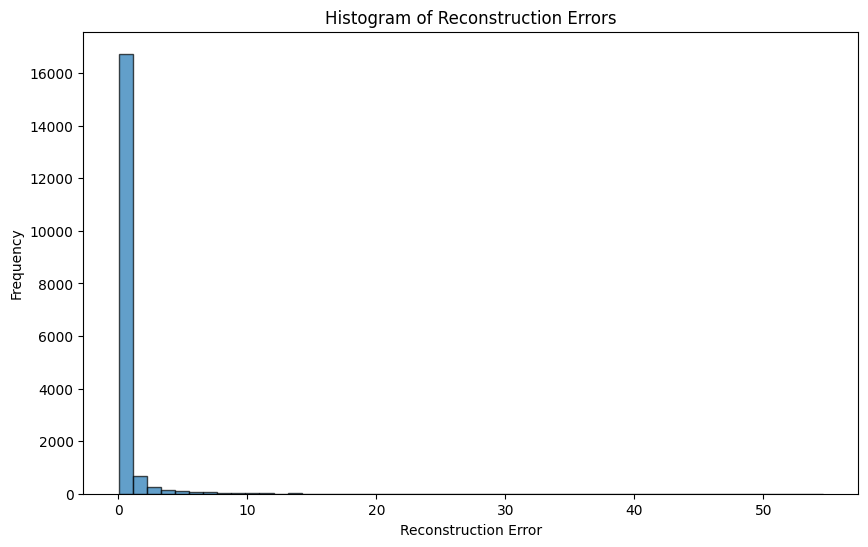

Number of anomalies detected: 449


In [46]:
import matplotlib.pyplot as plt

# Evaluate the model
model.eval()
with torch.no_grad():
    reconstructions = model(test_data_tensor)
    reconstruction_errors = torch.mean((reconstructions - test_data_tensor) ** 2, dim=1).numpy()

# Plot the histogram of reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# Set a threshold for anomaly detection
threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)
anomalies = reconstruction_errors > threshold

print(f'Number of anomalies detected: {np.sum(anomalies)}')

# Save the reconstruction errors and anomalies for further analysis
results = pd.DataFrame({
    'Reconstruction Error': reconstruction_errors,
    'Anomaly': anomalies
})
results.to_csv('anomaly_detection_results.csv', index=False)


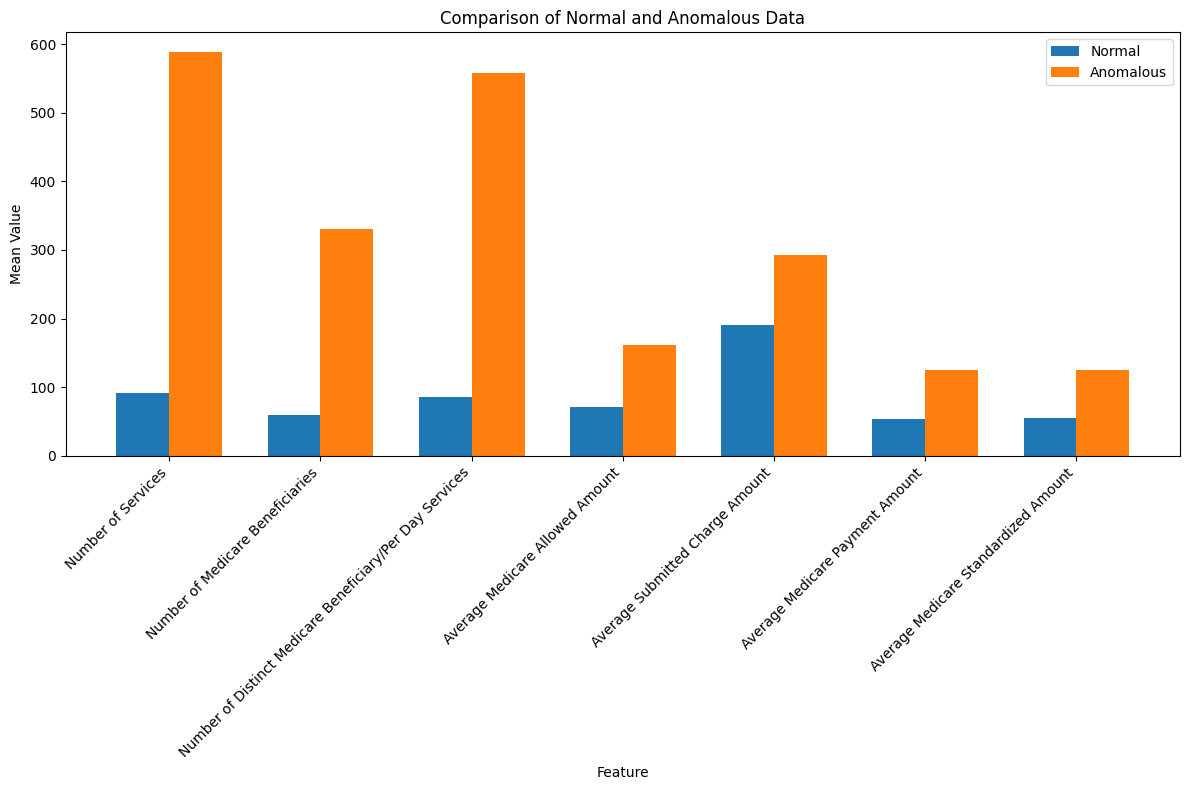

In [48]:
import matplotlib.pyplot as plt

# Load the anomaly detection results
results = pd.read_csv('anomaly_detection_results.csv')
numerical_data = pd.read_csv('healthnew.csv')[numerical_columns].apply(pd.to_numeric, errors='coerce').dropna().iloc[train_size:]

# Ensure the lengths match
assert len(results) == len(numerical_data), "Lengths of the results and numerical data do not match."

# Add a column for anomalies to the original data
numerical_data['Anomaly'] = results['Anomaly'].values

# Separate normal and anomalous data
normal_data = numerical_data[numerical_data['Anomaly'] == False]
anomalous_data = numerical_data[numerical_data['Anomaly'] == True]

# Compute mean of each column for both normal and anomalous data
normal_means = normal_data.mean()
anomalous_means = anomalous_data.mean()

# Drop the 'Anomaly' column from the means
normal_means = normal_means.drop('Anomaly')
anomalous_means = anomalous_means.drop('Anomaly')

# Plot the comparison
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(normal_means))

bar1 = ax.bar(index, normal_means, bar_width, label='Normal')
bar2 = ax.bar(index + bar_width, anomalous_means, bar_width, label='Anomalous')

ax.set_xlabel('Feature')
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Normal and Anomalous Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(normal_means.index, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
